In [ ]:
!pip3 install tensorflow

Looking in indexes: http://sg.mirrors.cloud.aliyuncs.com/pypi/simple/
     |████████████████████████████████| 394.4 MB 501 kB/s eta 0:00:0101    |█████████▌                      | 116.7 MB 82.7 MB/s eta 0:00:04     |█████████████████████████▏      | 309.8 MB 148.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 28.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 27.7 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 85.1 MB/s eta 0:00:01
     |██████████████████████████

     |████████████████████████████████| 77 kB 63.8 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=ce73130111248fe35ee2c5ced5abb902f9a7eae20431c3bf66096263aad2336d
  Stored in directory: /root/.cache/pip/wheels/58/40/2f/b25cbb5895b0e7d91ce541a94697db0d2674f30ef018a65304
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=78513 sha256=922e9081be0a602fa340aa0b78e1947bb74da7425f7eaa2954dcd7c286d2f6fb
  Stored in directory: /root/.cache/pip/wheels/9a/a4/c4/59bb3a7794be3421cc7fbeaeebd0d1e998a53e5e893d135b59
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Not uninstalling wheel at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'wheel'. No files were found to uni

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [ ]:
# Add a final dimension to the arrays
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
model = Sequential([
                    Conv2D(8, 3, 2, activation='relu', name='conv1', input_shape=(28,28,1)),
                    Flatten(),
                    # No activation function specified, so no activation is applied and logits are returned
                    Dense(10, name='Dense')
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
Dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7368 - sparse_categorical_accuracy: 0.7533 - val_loss: 0.4385 - val_sparse_categorical_accuracy: 0.8416
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3874 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3974 - val_sparse_categorical_accuracy: 0.8562
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3438 - sparse_categorical_accuracy: 0.8762 - val_loss: 0.3846 - val_sparse_categorical_accuracy: 0.8654
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3293 - sparse_categorical_accuracy: 0.8818 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.8742
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3070 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.3517 - val_sparse_categorical_accuracy: 0.8728


In [ ]:
# Get the temp directory of the server (/tmp)
MODEL_DIR = tempfile.gettempdir()
version = 1
# Path to export the model to
export_path = os.path.join(MODEL_DIR, str(version))
print(f'Exported to: {export_path}')

Exported to: /tmp/1


In [ ]:
export_path = f'{MODEL_DIR}/tf_models/{version}'

In [ ]:
# Must save tf model to a SavedModel format for tf serving to use it

tf.keras.models.save_model(model, f'{MODEL_DIR}/tf_models/{version}', overwrite=True, include_optimizer=True,     save_format=None,
    signatures=None,
    options=None)
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/tf_models/1/assets


INFO:tensorflow:Assets written to: /tmp/tf_models/1/assets


ls: cannot access '/tmp/1': No such file or directory


In [ ]:
# saved_model_cli is from tf, gives more info about the saved_model
!saved_model_cli show --dir {export_path} --all

2021-03-26 11:57:00.338052: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-03-26 11:57:00.338106: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serv

In [ ]:
import sys

# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   4445      0 --:--:-- --:--:-- --:--:--  4438
OK
Hit:1 http://sg.mirrors.cloud.aliyuncs.com/ubuntu focal InRelease
Get:2 http://sg.mirrors.cloud.aliyuncs.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://sg.mirrors.cloud.aliyuncs.com/ubuntu focal-security InRelease [109 kB]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Hit:5 https://download.docker.com/linux/ubuntu focal InRelease         
Get:6 http://sg.mirrors.cloud.aliyuncs.com/ubuntu focal-updates/main Sources [374 kB]
Get:7 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 Packages [340 B]
Get:8 http://sg.mirrors.cloud.aliyuncs.com/ubunt

In [ ]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 225 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.1 [223 MB]
Fetched 223 MB in 19s (11.9 MB/s)                                              
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144136 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.1_all.deb ...
Unpacking tensorflow-model-server (2.4.1) ...
Setting up tensorflow-model-server (2.4.1) ...


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
!rm server.log

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8199 \
  --model_name=fashion_mnist \
  --model_base_path="/tmp/tf_models" > server.log 2>&1

In [ ]:
!tail server.log

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-03-26 11:59:42.881684: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2021-03-26 11:59:42.882710: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499990000 Hz
2021-03-26 11:59:42.912882: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /tmp/tf_models/1
2021-03-26 11:59:42.919821: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 77679 microseconds.
2021-03-26 11:59:42.920632: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/tf_models/1/assets.extra/tf_serving_warmup_requests
2021-03-26 11:59:42.921207: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version

In [ ]:
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28))
  plt.axis('off')
  plt.title(f'\n\n{title}', fontdict={'size':16})

In [ ]:
import random
import json
import requests

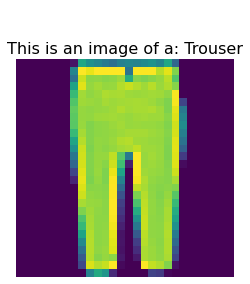

In [ ]:
rn = random.randint(0, len(x_test)-1)
show(rn, f'This is an image of a: {class_names[y_test[rn]]}')

In [ ]:
sample_idx = 2

data = json.dumps({"signature_name": "serving_default", "instances": x_test[sample_idx].reshape(-1,28,28,1).tolist()})

In [ ]:
headers = {'content-type': "application/json"}
res = requests.post('http://localhost:8199/v1/models/fashion_mnist:predict', data=data, headers=headers)

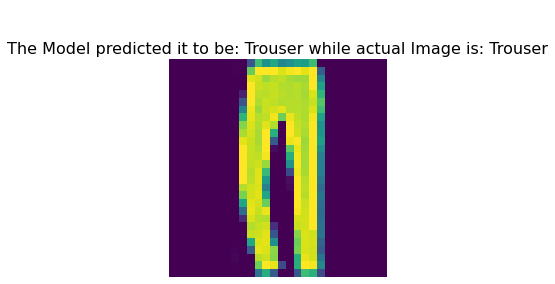

In [ ]:
preds = json.loads(res.text)['predictions']
show(sample_idx, f'The Model predicted it to be: {class_names[np.argmax(preds[0])]} while actual Image is: {class_names[y_test[sample_idx]]}')

## Tf Serving with Docker

In [ ]:
!docker pull tensorflow/serving

Using default tag: latest
latest: Pulling from tensorflow/serving

e2592276: Pulling fs layer 
2dfcfa9c: Pulling fs layer 
e92c540b: Pulling fs layer 
d7eb8873: Pulling fs layer 
bd37b38c: Pulling fs layer 
6a94bde8: Pulling fs layer 
Digest: sha256:d984dbe2de34e131dbdd7f85ba993696da56c89b91f0b2559e482598919a2c5e
Status: Downloaded newer image for tensorflow/serving:latest
docker.io/tensorflow/serving:latest


In [ ]:
# The local port that docker will map to
os.environ['LOCAL_PORT'] = str(8522)

File Structure

---



```
/tmp
    -- /tf_models
        -- /1
            -- /assets
            -- saved_model.pb
            -- /variables
        -- /2
            -- /assets
            -- saved_model.pb
            -- /variables
```



`
/tmp
    -- /tf_models
        -- /1
            -- /assets
            -- saved_model.pb
            -- /variables
        -- /2
            -- /assets
            -- saved_model.pb
            -- /variables
`

In [ ]:
# --mount type=bind will mount your specified local folder (specified in source) 
#  to the docker container's specified location (Specified in target)
# Here, you bind the /tmp/tf_models local folder to Docker's /models/mnist folder
# MODEL_BASE_PATH is an env variable that defaults to /models

# Command that docker will run based on input is as follows:
'''
tensorflow_model_server --port=8500 --rest_api_port=8501 \
    --model_name=${MODEL_NAME} --model_base_path=${MODEL_BASE_PATH}/${MODEL_NAME}
'''

# You must ensure that there is versions within your folder (I.e /tmp/tf_models/1 means version 1. /tmp/tf_models/2 means version 2)
# source should be the local folder containing all the model versions (I.e the root folder containing /1, /2, etc..) and inside these /1 folder will be the model.pb, variables,etc.. (From SavedModelFormat)
# target must start with /models(As this is an env var in the docker container under MODEL_BASE_PATH) followed by the MODEL_NAME (Which you map the env var)
# MODEL_NAME can be arbitary. But you must use /models infront as models is an premade env var used by docker
# Set the env variable of MODEL_NAME to the model name used in the target param

!docker run -d -p ${LOCAL_PORT}:8501 \
  --mount type=bind,source=/tmp/tf_models,target=/models/mnist \
  -e MODEL_NAME=mnist -t tensorflow/serving 

48828b38a004f217b861ae707afd73f8869f719cf970c3e27f5f9d6341fe57d4


In [ ]:
headers = {'content-type': "application/json"}

# Specify the local port docker has mapped to, the version number of model you want to use, followed by the MODEL_BASE_PATH/model_name
res = requests.post(f'http://localhost:{os.environ.get("LOCAL_PORT")}/v1/models/mnist:predict', data=data, headers=headers)
print(res.text)

{
    "predictions": [[-5.38828945, 6.16353, -10.6041288, -3.12053108, -5.27231884, -14.0627766, -8.18319607, -13.8012857, -8.5033741, -17.2718086]
    ]
}


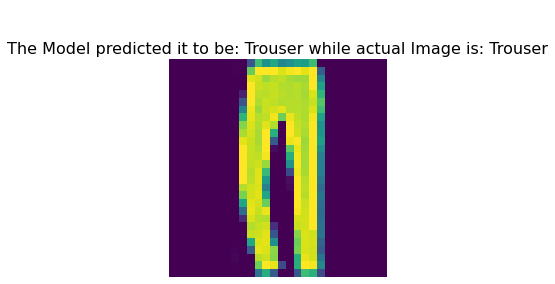

In [ ]:
preds = json.loads(res.text)['predictions']
show(sample_idx, f'The Model predicted it to be: {class_names[np.argmax(preds[0])]} while actual Image is: {class_names[y_test[sample_idx]]}')

In [ ]:
!docker container prune -y

unknown shorthand flag: 'y' in -y
See 'docker container prune --help'.


In [ ]:
!ls /tmp/1

assets	saved_model.pb	variables


In [ ]:
!ls /tmp/1

assets	saved_model.pb	variables
